In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [9]:
w = torch.Tensor([[1,2]])
x = torch.Tensor([[3,4]])
b = torch.Tensor([5])

In [10]:
print(w,x,b)

tensor([[1., 2.]]) tensor([[3., 4.]]) tensor([5.])


In [11]:
print(w.T)

tensor([[1.],
        [2.]])


In [12]:
print(torch.matmul(w.T,x))

tensor([[3., 4.],
        [6., 8.]])


In [13]:
print(torch.dot(w.T,x))

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [14]:
w = torch.Tensor([1,2])
x = torch.Tensor([3,4])
b = torch.Tensor([5])
print(w,x,b)

tensor([1., 2.]) tensor([3., 4.]) tensor([5.])


In [16]:
print(torch.dot(w.T,x))
print(torch.dot(w,x))

tensor(11.)
tensor(11.)


# Shallow NN by numpy

In [20]:
# data preparation
# xor data
x_seeds = np.array([(0,0),(1,0),(0,1),(1,1)],dtype=np.float)
y_seeds = np.array([0,1,1,0])
print(f"x_seeds dim : {x_seeds.shape}, y_seeds dim : {y_seeds.shape}")

N = 1000
idxs = np.random.randint(0,4,N)
print(f"idxs shape : {idxs.shape}")

X = x_seeds[idxs]
Y = y_seeds[idxs]
X += np.random.normal(scale=0.25,size=X.shape)

print(f'''
X shape : {X.shape} , Y shape : {Y.shape}
X is
{X}
Y is
{Y}
''')

x_seeds dim : (4, 2), y_seeds dim : (4,)
idxs shape : (1000,)

X shape : (1000, 2) , Y shape : (1000,)
X is
[[ 0.29222544  1.26488714]
 [ 0.83117819 -0.04895855]
 [ 0.58673709  1.21061902]
 ...
 [ 0.11048029 -0.05182768]
 [ 1.2576519   0.78626149]
 [ 0.6788475   1.45636212]]
Y is
[1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0
 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0
 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1
 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1
 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0

/Users/kwontaeyoon/opt/anaconda3/envs/DL/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
# plot function
def plot_SNN(X,Y) :
    idx_1 = np.where(Y>0.5)
    idx_0 = np.where(Y<=0.5)
    
    X_0 = X[idx_0]
    X_1 = X[idx_1]
    Y_0 = Y[idx_0]
    Y_1 = Y[idx_1]
    
    plt.plot(X_0[:,0],X_0[:,1],"r^")
    plt.plot(X_1[:,0],X_1[:,1],"bx")
    plt.show()
    

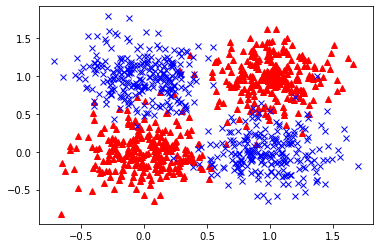

In [51]:
plot_SNN(X,Y)

In [31]:
class numpy_shallow_NN():
    def __init__(self,num_input_feature,num_hiddens):
        self.num_input = num_input_feature
        self.num_hiddens = num_hiddens
        
        self.W1 = np.random.normal(size=(self.num_hiddens,self.num_input))
        self.b1 = np.random.normal(size=self.num_hiddens)
        
        self.w2 = np.random.normal(size=self.num_hiddens)
        self.b2 = np.random.normal(size=1)
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def forward(self,x):
        z1 = np.matmul(self.W1,x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.w2,a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2,(z1,a1,z2,a2)

In [41]:
model = numpy_shallow_NN(2,4)

In [42]:
# Train
lr = 1
for epoch in range(0,100):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dw2 = np.zeros_like(model.w2)
    db2 = np.zeros_like(model.b2)
    N = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        yhat,(z1,a1,z2,a2) = model.forward(x)
        loss = -y*np.log(yhat) - (1-y)*np.log(1-yhat)
        cost += loss
        
        # Back Propagation
        diff = a2-y
        db2 += diff
        dw2 += a1 * diff
        db1 += diff * (1-a1**2) * model.w2
        dW1 += np.outer(diff * model.w2 * (1-a1**2),x)
        
    cost /= N
    if epoch % 10 == 0 :
        print(f"epoch : {epoch}, cost : {cost}")
    model.W1 -= lr * (dW1/N)
    model.b1 -= lr * (db1/N)
    model.w2 -= lr * (dw2/N)
    model.b2 -= lr * (db2/N)

epoch : 0, cost : [0.82670653]
epoch : 10, cost : [0.67691883]
epoch : 20, cost : [0.64938633]
epoch : 30, cost : [0.62187983]
epoch : 40, cost : [0.59661738]
epoch : 50, cost : [0.57183147]
epoch : 60, cost : [0.54425629]
epoch : 70, cost : [0.49102835]
epoch : 80, cost : [0.42719062]
epoch : 90, cost : [0.3741894]



(0,0) : 0.16318679018183546
(0,1) : 0.7432079771083896
(1,0) : 0.8890013270913298
(1,1) : 0.19244512132788488



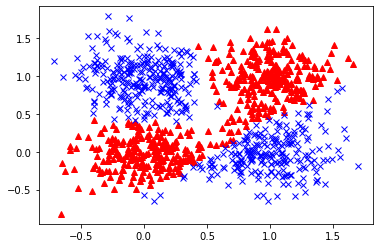

In [53]:
# Test
print(f'''
(0,0) : {model.forward((0,0))[0].item()}
(0,1) : {model.forward((0,1))[0].item()}
(1,0) : {model.forward((1,0))[0].item()}
(1,1) : {model.forward((1,1))[0].item()}
''')
#plot
Yhat = np.array([])
for x,y in zip(X,Y):
    yhat, _ = model.forward(x)
    Yhat = np.append(Yhat,yhat)

plot_SNN(X,Yhat)